Test Cases:
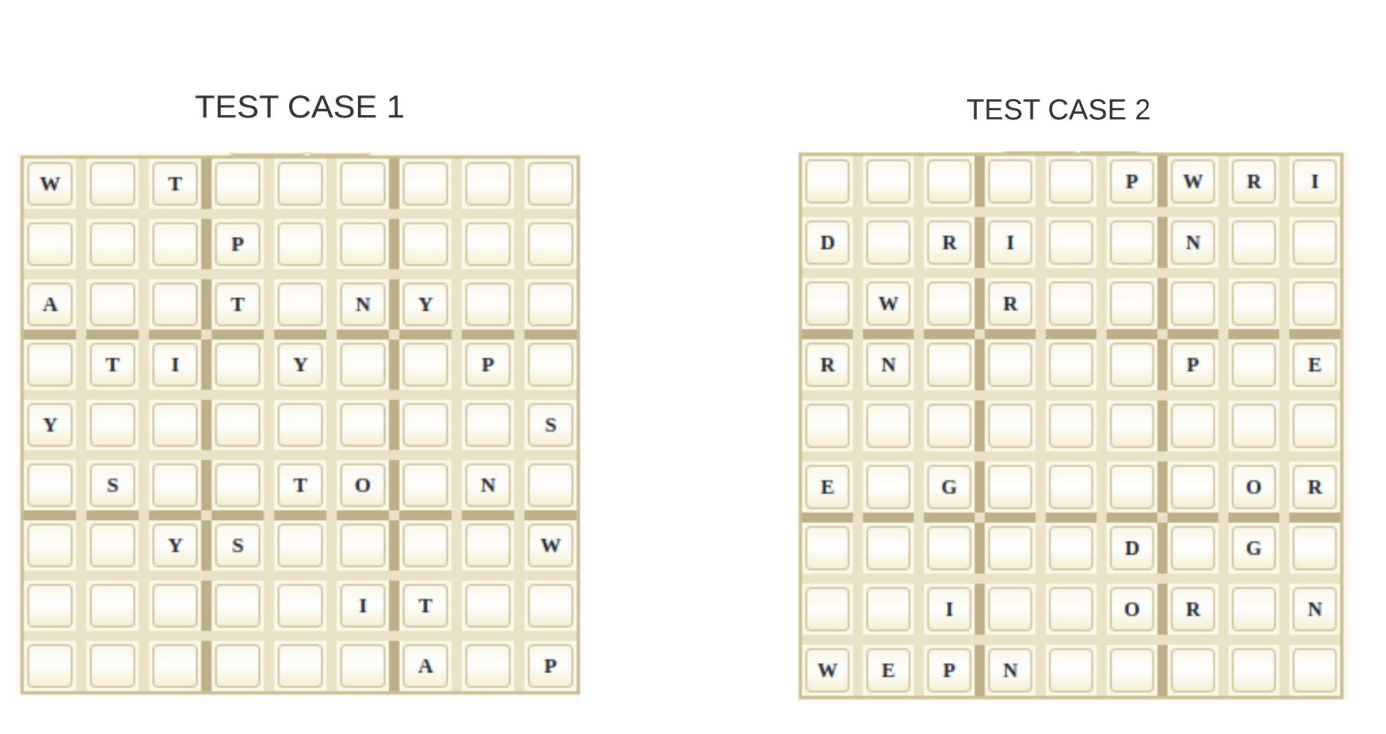

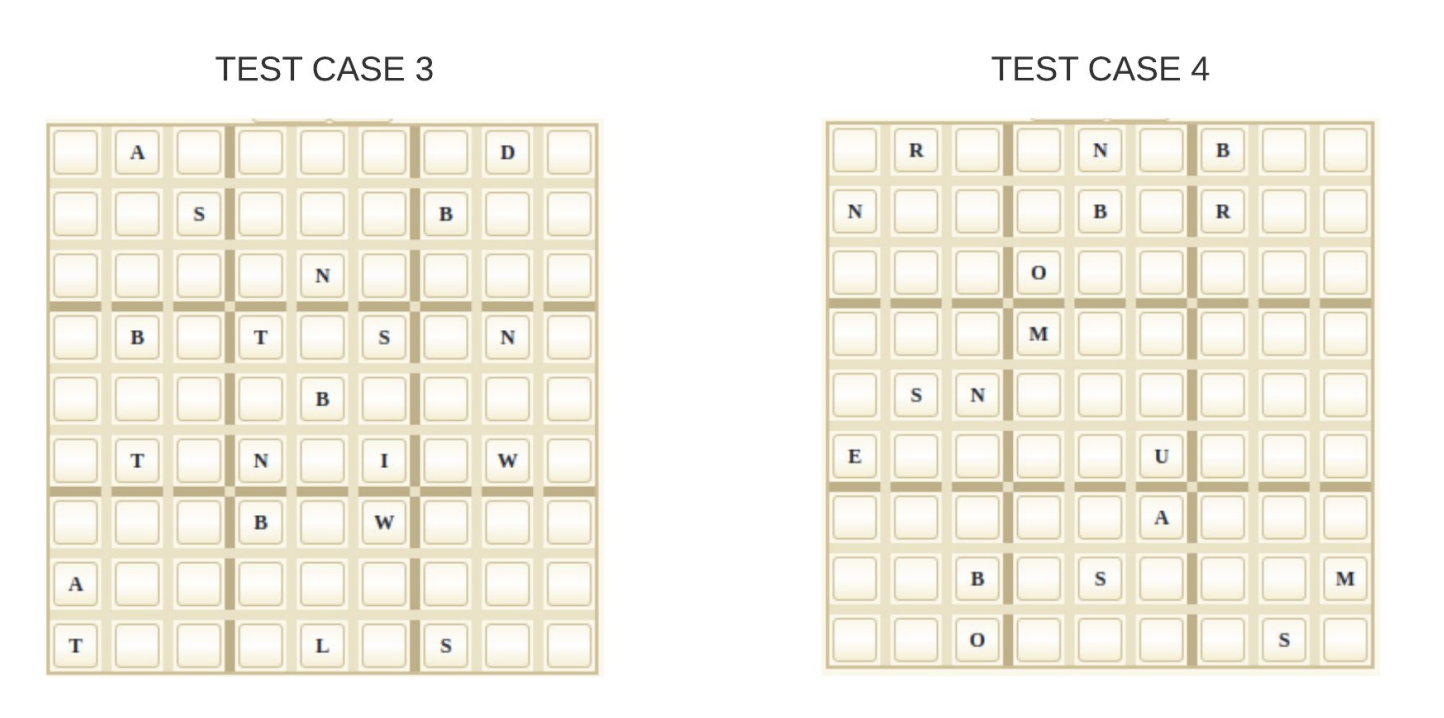

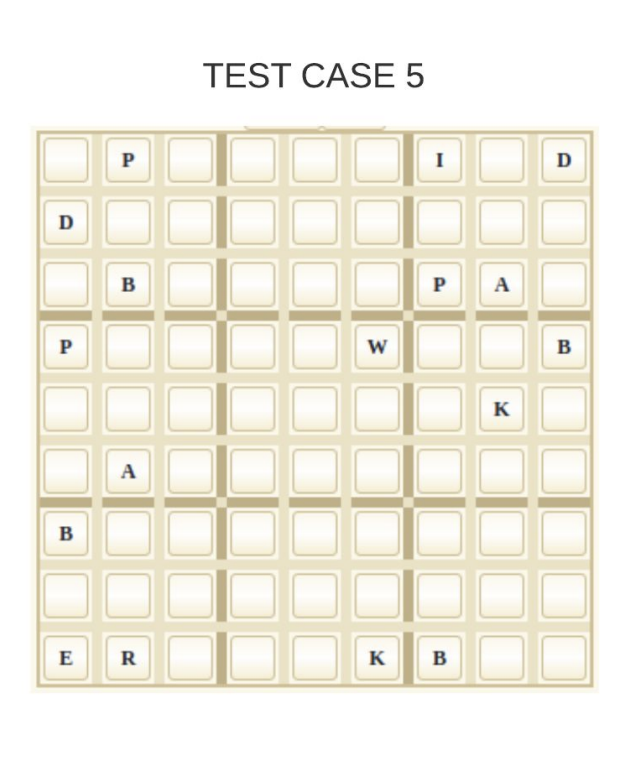

In [ ]:
!pip install PyDictionary

In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [962 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,079 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,059 kB]
Get:13 http://archive.ubuntu.com/ubu

In [ ]:
import time
def possible(ch,row,col,board,letters):
  #check the rows
  for i in range(0,9):
    if(board[row][i]==ch):
      return False
  for i in range(0,9):
    if(board[i][col]==ch):
      return False
  ilim=(row//3)*3
  jlim=(col//3)*3
  for i in range(ilim,ilim+3):
    for j in range(jlim,jlim+3):
      if board[i][j]==ch:
        return False
  return True

def solve(board,letters):
  for i in range(0,9):
    for j in range(0,9):
      if board[i][j]=="*":
        #print("Hit!!")
        for ch in letters:
          if possible(ch,i,j,board,letters):
            board[i][j]=ch
            temp=solve(board,letters)
            if temp is not None:
              return temp
            board[i][j]='*'
        return None
  return board
def wordokuSolver(board):
  letters=[]
  for row in board:
    for ch in row:
      if ch not in letters:
        letters.append(ch)
  #choose all the different combinations of letters
  return solve(board,letters)


#taking user input
f=open("./test_cases.txt",'r')
data=f.readlines()
f.close()
board=[]
#print("Please enter the intial configuration:")
#print(data)
index=0
for _ in range(0,5):
  index+=1
  board=[]
  for _ in range(0,9):
    #line=input()
    row=list(data[index])
    row.pop()
    index+=1
    board.append(row)
  for row in board:
    line=' '.join(row)
    print(line)
  print()
  start=time.time()
  ans=wordokuSolver(board)
  end=time.time()
  #ans=board;
  #print(type(ans[0]))
  if ans is not None:
    for i in range(0,9):
      line=' '.join(ans[i])
      print(line)
    print(f"It took {end-start} second to solve the problem")
  else:
    print("Couldn't solve !!!")

['T1:\n', 'W*T******\n', '***P*****\n', 'A**T*NY**\n', '*TI*Y**P*\n', 'Y*******S\n', '*S**TO*N*\n', '**YS****W\n', '*****IT**\n', '******A*P\n', 'T5:\n', '*P****I*D\n', 'D********\n', '*B****PA*\n', 'P****W**B\n', '*******K*\n', '*A*******\n', 'B********\n', '*********\n', 'ER***KB**\n', 'T2:\n', '*****PWRI\n', 'D*RI**N**\n', '*W*R*****\n', 'RN****P*E\n', '*********\n', 'E*G****OR\n', '*****D*G*\n', '**I**OR*N\n', 'WEPN*****\n', 'T3:\n', '*A*****D*\n', '**S***B**\n', '****N****\n', '*B*T*S*N*\n', '****B****\n', '*T*N*I*W*\n', '***B*W***\n', 'A********\n', 'T***L*S**\n', 'T4:\n', '*R**N*B**\n', 'N***B*R**\n', '***O*****\n', '***M*****\n', '*SN******\n', 'E****U***\n', '*****A***\n', '**B*S***M\n', '**O****S*\n']
W * T * * * * * *
* * * P * * * * *
A * * T * N Y * *
* T I * Y * * P *
Y * * * * * * * S
* S * * T O * N *
* * Y S * * * * W
* * * * * I T * *
* * * * * * A * P

W I T O S Y P A N
N Y O P I A S W T
A P S T W N Y O I
O T I N Y S W P A
Y N A I P W O T S
P S W A T O I N Y
T O Y S 

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Backtracking with constraint propogation

W * T * * * * * *
* * * P * * * * *
A * * T * N Y * *
* T I * Y * * P *
Y * * * * * * * S
* S * * T O * N *
* * Y S * * * * W
* * * * * I T * *
* * * * * * A * P

W I T O S Y P A N
N Y O P I A S W T
A P S T W N Y O I
O T I N Y S W P A
Y N A I P W O T S
P S W A T O I N Y
T O Y S A P N I W
S A P W N I T Y O
I W N Y O T A S P
It took 1.3516714572906494 second to solve the problem
The number of nodes explored is 45598
-------------------------------------------------
['w', 'wi', 'wit', 'i', 'it', 't', 'to', 'tosy', 'o', 'os', 's', 'y', 'p', 'pa', 'a', 'n', 'y', 'yo', 'o', 'p', 'pi', 'pia', 'i', 'a', 'as', 's', 'w', 'a', 'p', 'pst', 's', 'st', 't', 'w', 'n', 'y', 'yo', 'o', 'o', 't', 'ti', 'tin', 'tiny', 'i', 'in', 'n', 'y', 's', 'w', 'p', 'y', 'yn', 'n', 'na', 'a', 'ai', 'i', 'p', 'w', 'wo', 'wot', 'o', 't', 'p', 's', 'swa', 'swat', 'w', 'wa', 'wat', 'a', 'at', 't', 'to', 'toi', 'o', 'i', 'in', 'n', 't', 'to', 'toy', 'o', 'y', 's', 'sa', 'sap', 'a', 'p', 'n', 'ni', 'i', 's', 'sa', 'sap', '

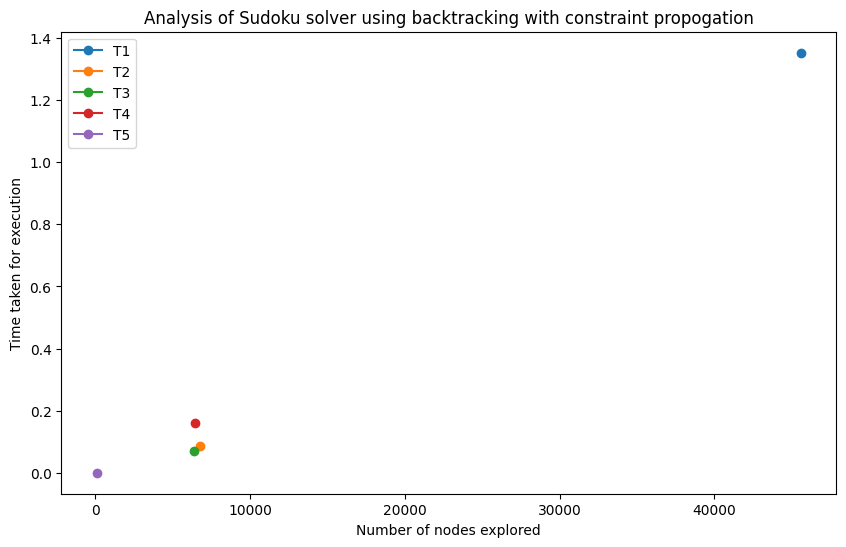

In [ ]:
#Constraint propogation code
# Time complexity is O(9^k) where k is the number of empty cells
#for every empty cell,we have 9 options. When we use constraint propogation,the options for every cell reduces,but the upper bound is still O(9^k)
# The space complexity will be O(k) where k is the number of blank spaces
#seacrhing the words is taking a lot of time,so I have commented it out for the time being
import time
import copy
from nltk.corpus import words
english_words=words.words()
no_of_nodes=0
def possible(ch,row,col,board):
  #check the rows
  for i in range(0,9):
    if(board[row][i]==ch):
      return False
  for i in range(0,9):
    if(board[i][col]==ch):
      return False
  ilim=(row//3)*3
  jlim=(col//3)*3
  for i in range(ilim,ilim+3):
    for j in range(jlim,jlim+3):
      if board[i][j]==ch:
        return False
  return True

def solve(board,constraints):
  global no_of_nodes
  no_of_nodes+=1
  for i in range(0,9):
    for j in range(0,9):
      if board[i][j]=="*":
        #print("Hit!!")
        for ch in constraints[i][j]:
          if possible(ch,i,j,board):
            board[i][j]=ch
            #new_const=update(i,j,ch,constraints)
            temp=solve(board,constraints)
            if temp is not None:
              return temp
            board[i][j]='*'
        return None
  return board
def wordokuSolver(board,constraints):
  #choose all the different combinations of letters
  return solve(board,constraints)

def update(row,col,val,constraints):
  constraints=copy.deepcopy(constraints)
  #update all in the row
  for i1 in range(0,9):
    if val in constraints[row][i1]:
      constraints[row][i1].remove(val)
  for i2 in range(0,9):
    if val in constraints[i2][col]:
      constraints[i2][col].remove(val)
  #update the square
  ilim=(row//3)*3
  jlim=(col//3)*3
  for i in range(ilim,ilim+3):
    for j in range(jlim,jlim+3):
      if val in constraints[i][j]:
        constraints[i][j].remove(val)
  return constraints

def meaningful_words(ans):
    global english_words
    meaningful=[]
    for row in ans:
      temp=''.join(row)
      for i2 in range(0,9):
        for j2 in range(i2+1,9):
          word=temp[i2:j2]
          word=word.lower()
          # print(word)
          if word in english_words:
            meaningful.append(word)
    for k in range(0,9):
      temp=[]
      for i in range(0,9):
        temp.append(ans[i][k])
      temp=''.join(temp)
      for i in range(0,9):
        for j in range(i+1,9):
          word=temp[i:j]
          word=word.lower()
          if word in english_words:
            meaningful.append(word)
    for i in range(0,9):#the rows
      for j in range(0,9):#the cols
          I=i
          J=j
          temp=""
          while I<9 and J<9:
            temp+=ans[I][J]
            I+=1
            J+=1
          length=len(temp)
          for I in range(0,length):
            for J in range(I+1,length):
              word=temp[I:J]
              word=word.lower()
              if word in english_words:
                meaningful.append(word)
    print(meaningful)


#taking user input
f=open("./test_cases.txt",'r')
data=f.readlines()
f.close()
board=[]
#print("Please enter the intial configuration:")
#print(data)
index=0
exec_time=[]
nodes_explored=[]
for _ in range(0,5):
  index+=1
  board=[]
  no_of_nodes=0
  for _ in range(0,9):
    #line=input()
    row=list(data[index])
    row.pop()
    index+=1
    board.append(row)
  for row in board:
    print(' '.join(row))
  print()
  #for making constraint table
  letters=[]
  for i in range(0,9):
    for j in range(0,9):
      if board[i][j] not in letters:
        letters.append(board[i][j])
  letters.remove('*')
  #print(letters)
  constraints=[]
  for i in range(0,9):
    temp=[]
    for j in range(0,9):
      if board[i][j] == '*':
        lt=[]
        for ch in letters:
          lt.append(ch)
        temp.append(lt)
      else:
        temp.append([])
    constraints.append(temp)

  for i1 in range(0,9):
    for j1 in range(0,9):
      if board[i1][j1]!='*':
        constraints=update(i1,j1,board[i1][j1],constraints)
  # for i in range(0,9):
  #   for j in range(0,9):
  #     if len(constraints[i][j])==1:
  #       constraints=update(i,j,constraints[i][j][0],constraints)
  # #print(constraints)
  # for row in constraints:
  #   print(row)
  #
  start=time.time()
  ans=wordokuSolver(board,constraints)
  end=time.time()
  #ans=board;
  #print(type(ans[0]))
  if ans is not None:
    nodes_explored.append(no_of_nodes)
    for i in range(0,9):
      line=' '.join(ans[i])
      print(line)
    exec_time.append(end-start)
    print(f"It took {end-start} second to solve the problem")
    print(f"The number of nodes explored is {no_of_nodes}")
    print("-------------------------------------------------")
    #to search for meaningful words
    meaningful_words(ans)
  else:
    print("Couldn't solve !!!")

  #now to plot these values
import matplotlib.pyplot as plt
test_cases=["T1","T2","T3","T4","T5"]
plt.figure(figsize=(10,6))
for i,case in enumerate(test_cases):
  plt.plot(nodes_explored[i],exec_time[i],marker="o",label=case)
plt.xlabel("Number of nodes explored")
plt.ylabel("Time taken for execution")
plt.title("Analysis of Sudoku solver using backtracking with constraint propogation")
plt.legend()
plt.show()

# Min Conflict

In [ ]:
#Sudoku solver using min conflicts
import copy
def conf(row,col,val,board):
  ret=0
  for i in range(0,9):
    if(board[row][i]==val):
      ret+=1
  for i in range(0,9):
    if board[i][col]==val:
      ret+=1
  ilim=(row//3)*3
  jlim=(col//3)*3
  for i in range(ilim,ilim+3):
    for j in range(jlim,jlim+3):
      if board[i][j]==val:
        ret+=1
  return ret



def min_conflict(board,letters,constraints,max_steps,og_board):
  while max_steps>0:
    conflicts=[]
    track=0
    for i in range(0,9):
      for j in range(0,9):
        if og_board[i][j]=='*':
          minval=float('inf')
          if board[i][j]!='*':
            minval=conf(i,j,board[i][j],board)
          # for ch in letters:
          #   temp=conf(i,j,ch,board)
          #   if temp<minval:
          #     minch=ch
          #     minval=temp
          ch=random.choice(constraints[i][j])
          if conf(i,j,ch,board)<minval:
            board[i][j]=ch
            track+=1
    if track==0:
      return board
    # for conflict in conflicts:
    #   row,col,ch= conflict
    #   board[row][col]=ch

    max_steps-=1

  return None

#taking user input
f=open("./test_cases.txt",'r')
data=f.readlines()
f.close()
board=[]
#print("Please enter the intial configuration:")
#print(data)
index=0
exec_time=[]
nodes_explored=[]
for _ in range(0,5):
  index+=1
  board=[]
  no_of_nodes=0
  for _ in range(0,9):
    #line=input()
    row=list(data[index])
    row.pop()
    index+=1
    board.append(row)
  for row in board:
    print(' '.join(row))
  print()
  #for making constraint table
  letters=[]
  for i in range(0,9):
    for j in range(0,9):
      if board[i][j] not in letters:
        letters.append(board[i][j])
  letters.remove('*')
  #print(letters)
  constraints=[]
  for i in range(0,9):
    temp=[]
    for j in range(0,9):
      if board[i][j] == '*':
        lt=[]
        for ch in letters:
          lt.append(ch)
        temp.append(lt)
      else:
        temp.append([])
    constraints.append(temp)

  for i1 in range(0,9):
    for j1 in range(0,9):
      if board[i1][j1]!='*':
        constraints=update(i1,j1,board[i1][j1],constraints)
  start=time.time()
  og_board=copy.deepcopy(board)
  ans=min_conflict(board,letters,constraints,50000,og_board)
  end=time.time()
  #ans=board;
  #print(type(ans[0]))
  if ans is not None:
    nodes_explored.append(no_of_nodes)
    for i in range(0,9):
      line=' '.join(ans[i])
      print(line)
    exec_time.append(end-start)
    print(f"It took {end-start} second to solve the problem")
    # print(f"The number of nodes explored is {no_of_nodes}")
    print("-------------------------------------------------")
    #to search for meaningful words
    #meaningful_words(ans)
  else:
    print("Couldn't solve !!!")
    for i in range(0,9):
      line=' '.join(board[i])
      print(line)
    print("-------------------------------------------------")
    #even if it fails,it prints the closest board it found
  #now to plot these values
# import matplotlib.pyplot as plt
# test_cases=["T1","T2","T3","T4","T5"]
# plt.figure(figsize=(10,6))
# for i,case in enumerate(test_cases):
#   plt.plot(nodes_explored[i],exec_time[i],marker="o",label=case)
# plt.xlabel("Number of nodes explored")
# plt.ylabel("Time taken for execution")
# plt.title("Analysis of Sudoku solver using backtracking with constraint propogation")
# plt.legend()
# plt.show()

W * T * * * * * *
* * * P * * * * *
A * * T * N Y * *
* T I * Y * * P *
Y * * * * * * * S
* S * * T O * N *
* * Y S * * * * W
* * * * * I T * *
* * * * * * A * P

Couldn't solve !!!
W P T A S A I O N
O N N P S W O A N
A P P T I N Y S O
N T I N Y S O P A
Y O W A P A W O S
P S A I T O I N Y
T A Y S N T N I W
N N O A W I T S Y
I O S Y N W A S P
-------------------------------------------------
* * * * * P W R I
D * R I * * N * *
* W * R * * * * *
R N * * * * P * E
* * * * * * * * *
E * G * * * * O R
* * * * * D * G *
* * I * * O R * N
W E P N * * * * *

Couldn't solve !!!
O O N G E P W R I
D G R I W W N P G
N W E R O N E D G
R N D D W I P I E
I D O E O W G D W
E P G W N I D O R
N R N E I D E G O
G D I W E O R P N
W E P N R G I I O
-------------------------------------------------
* A * * * * * D *
* * S * * * B * *
* * * * N * * * *
* B * T * S * N *
* * * * B * * * *
* T * N * I * W *
* * * B * W * * *
A * * * * * * * *
T * * * L * S * *

Couldn't solve !!!
W A I S T B W D L
N L S W A A 